# Step 4: Analyze results

In [1]:
import pycompwa.ui as pwa

2021-10-22 22:33:56,425 INFO [default] Logging to file disabled!
2021-10-22 22:33:56,426 [INFO] Log level: INFO
2021-10-22 22:33:56,426 [INFO] Current date and time: Fri Oct 22 22:33:56 2021



/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/traitlets/traitlets.py:3050: FutureWarning: --rc={'figure.dpi': 96} for dict-traits is deprecated in traitlets 5.0. You can pass --rc <key=value> ... multiple times to add items to a dict.
  FutureWarning,


In [2]:
pwa.Logging("error")  # at this stage, we are not interested in the back-end
particle_list = pwa.read_particles("model.xml")
kinematics = pwa.create_helicity_kinematics("model.xml", particle_list)
kinematics.create_all_subsystems()
data_sample = pwa.read_root_data(input_file="generated_data.root")
phsp_sample = pwa.read_root_data(input_file="generated_phsp.root")
intensity_builder = pwa.IntensityBuilderXML(
    "model.xml", particle_list, kinematics, phsp_sample
)
fit_result = pwa.load("fit_result.xml")
intensity = intensity_builder.create_intensity()
data_set = kinematics.convert(data_sample)
phsp_set = kinematics.convert(phsp_sample)
(
    estimator,
    initial_parameters,
) = pwa.create_unbinned_log_likelihood_function_tree_estimator(
    intensity, data_set
)
intensity.updateParametersFrom(fit_result.final_parameters)

2021-10-22 22:33:56,785 [INFO] Logging to file disabled!


ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!


Invoking:
  

LC_ALL=C x86_64-linux-gnu-g++-7  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 >/dev/null | awk '/^#include </,/^End of search/{if (!/^#include </ && !/^End of search/){ print }}' | GREP_OPTIONS= grep -E "(c|g)\+\+"

Results was:


With exit code 

256

## 4.1 Convert to pandas

In [3]:
from pycompwa.data import convert

In [4]:
frame_data = convert.data_set_to_pandas(data_set)
frame_phsp = convert.data_set_to_pandas(phsp_set)
frame_data

,phi_2_34,phi_24_3,"mSq_(2,3)",phi_2_3_vs_4,theta_2_34,"mSq_(2,4)",theta_23_4,"mSq_(3,4)",theta_34_2,"mSq_(2,3,4)",theta_3_4_vs_2,phi_34_2,phi_23_4,theta_2_3_vs_4,theta_24_3,phi_2_4_vs_3,phi_3_4_vs_2,theta_2_4_vs_3
0,2.102657,2.247974,7.041085,1.782934,1.002477,0.543847,2.745762,2.042295,2.139116,9.59079,0.502226,-1.038936,0.498287,2.224991,0.797810,-0.554556,0.463670,0.915063
1,2.071876,2.106510,3.162373,0.072829,2.604591,4.057776,2.852961,2.407078,0.537001,9.59079,1.697711,-1.069717,-0.965088,1.299054,1.578960,-0.020714,0.040498,1.424155
2,-0.889536,-1.756459,4.671107,-0.724954,2.297602,3.687157,1.794325,1.268963,0.843991,9.59079,1.448707,2.252057,-0.229754,1.039627,2.432907,1.456694,-2.095938,0.938116
3,2.007197,-3.122791,2.253370,1.288726,1.385250,3.558244,0.925994,3.815613,1.756343,9.59079,1.800957,-1.134396,1.112438,1.595627,2.159360,-1.965977,2.245262,1.827414
4,-2.553175,-3.092292,1.277894,-0.255728,1.157882,5.765827,0.701375,2.583506,1.983710,9.59079,2.277980,0.588417,-2.428574,1.152534,2.789166,2.649058,-2.962439,1.918852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.222349,0.534366,3.694790,0.860415,2.257719,1.919805,1.999034,4.012632,0.883873,9.59079,1.243871,2.919244,-2.017723,1.929566,1.716018,-0.771193,1.101634,1.600783
9996,-1.343847,-1.411040,6.871474,-0.685393,0.886257,0.165163,2.657135,2.590590,2.255336,9.59079,0.238120,1.797745,1.425939,2.746994,0.773063,0.435808,-0.390363,0.879317
9997,-1.598526,-0.592358,2.555019,1.917279,0.627246,6.196502,0.665568,0.875706,2.514347,9.59079,2.022378,1.543067,-2.206541,0.684207,1.084305,-2.424707,1.715182,1.026751
9998,-2.735183,0.200863,0.232193,0.320457,1.459895,5.701769,1.247911,3.693265,1.681698,9.59079,2.783947,0.406410,-2.805244,1.244396,2.221093,-0.384746,2.836304,2.694432


In [5]:
intensity_set = intensity.evaluate(phsp_set.data)
frame_phsp["weights"] = intensity_set

## 4.2 Visualize

### Kinematic variables

In [6]:
from pycompwa.data import naming

naming.replace_ids("2,3", "model.xml")

'gamma,pi0'

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_1d_comparison(name, bins=100, **kwargs):
    """Helper function for comparing the 1D distributions of fit and data."""
    frame_data[name].hist(
        bins=bins, density=True, alpha=0.5, label="data", **kwargs
    )
    frame_phsp[name].hist(
        bins=bins,
        weights=frame_phsp["weights"],
        density=True,
        histtype="step",
        color="red",
        label="fit",
        **kwargs,
    )
    plt.ylabel("normalized intensity")
    title = naming.replace_ids(name, kinematics)
    plt.xlabel(title)

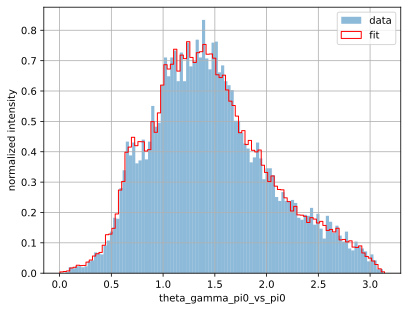

In [9]:
plot_1d_comparison("theta_2_4_vs_3")
plt.legend();

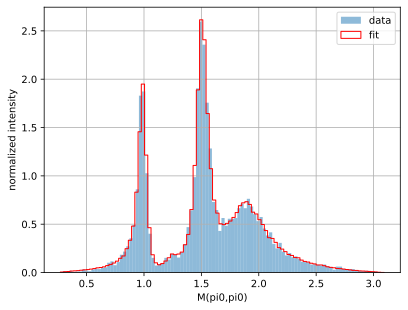

In [10]:
from numpy import sqrt

frame_data["M(3,4)"] = sqrt(frame_data["mSq_(3,4)"])
frame_phsp["M(3,4)"] = sqrt(frame_phsp["mSq_(3,4)"])

plot_1d_comparison("M(3,4)")
plt.legend();

### Dalitz plots

Dalitz plots are 2-dimensional histograms of the square values of the
invariant masses. We are therefore interested in the following variables:

In [11]:
variable_names = data_set.data.keys()
[var for var in variable_names if var.startswith("mSq_")]

['mSq_(2,3)', 'mSq_(2,4)', 'mSq_(3,4)', 'mSq_(2,3,4)']

In [12]:
def dalitz_plot(frame, mass_x, mass_y, bins=50, **kwargs):
    """Helper function to create a Dalitz plot with useful axis titles."""
    plt.hist2d(frame[mass_x], frame[mass_y], bins=bins, **kwargs)
    plt.xlabel(naming.replace_ids(mass_x, kinematics))
    plt.ylabel(naming.replace_ids(mass_y, kinematics))

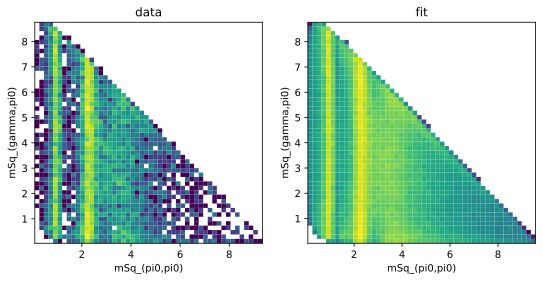

In [13]:
from matplotlib.colors import LogNorm  # logarithmic z-axis

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

plt.sca(axs[0])
axs[0].set_title("data")
dalitz_plot(frame_data, "mSq_(3,4)", "mSq_(2,4)", norm=LogNorm())

plt.sca(axs[1])
axs[1].set_title("fit")
dalitz_plot(
    frame_phsp,
    "mSq_(3,4)",
    "mSq_(2,4)",
    norm=LogNorm(),
    weights=frame_phsp["weights"],
)

## 4.3 Calculate fit fractions

In [14]:
intensity_builder.get_all_component_names()

{'J/psi_-1_to_f0(1500)_0+gamma_-1;f0(1500)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f0(1500)_0+gamma_1;f0(1500)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f0(980)_0+gamma_-1;f0(980)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f0(980)_0+gamma_1;f0(980)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_-1+gamma_-1;f2(1270)_-1_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_-2+gamma_-1;f2(1270)_-2_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_0+gamma_-1;f2(1270)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_0+gamma_1;f2(1270)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_1+gamma_1;f2(1270)_1_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_2+gamma_1;f2(1270)_2_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1950)_-1+gamma_-1;f2(1950)_-1_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1950)_-2+gamma_-1;f2(1950)_-2_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1950)_0+gamma_-1;f2(1950)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to

As you can see, these components are amplitudes and intensities that are
added coherently or incoherently.

In [15]:
components = intensity_builder.create_intensity_components(
    [
        ["coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0"],
        ["J/psi_-1_to_f2(1270)_-1+gamma_-1;f2(1270)_-1_to_pi0_0+pi0_0;"],
        ["J/psi_-1_to_f2(1270)_-2+gamma_-1;f2(1270)_-2_to_pi0_0+pi0_0;"],
        ["J/psi_-1_to_f2(1270)_0+gamma_-1;f2(1270)_0_to_pi0_0+pi0_0;"],
        [
            "J/psi_-1_to_f2(1270)_-1+gamma_-1;f2(1270)_-1_to_pi0_0+pi0_0;",
            "J/psi_-1_to_f2(1270)_-2+gamma_-1;f2(1270)_-2_to_pi0_0+pi0_0;",
            "J/psi_-1_to_f2(1270)_0+gamma_-1;f2(1270)_0_to_pi0_0+pi0_0;",
        ],
    ]
)

In [16]:
fit_fractions = pwa.fit_fractions_with_propagated_errors(
    [
        (components[1], components[0]),
        (components[2], components[0]),
        (components[3], components[0]),
        (components[4], components[0]),
    ],
    phsp_set,
    fit_result,
)

In [17]:
for fraction in fit_fractions:
    print(fraction.name.replace(";", "\n  "))
    print(fraction.value, "+/-", fraction.error)
    print()

J/psi_-1_to_f2(1270)_-1+gamma_-1
  f2(1270)_-1_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.005501850829390682 +/- 0.0022183891762600186

J/psi_-1_to_f2(1270)_-2+gamma_-1
  f2(1270)_-2_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.012420672413645816 +/- 0.0026534387760138328

J/psi_-1_to_f2(1270)_0+gamma_-1
  f2(1270)_0_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.010391539894775193 +/- 0.0021906857117477293

J/psi_-1_to_f2(1270)_-1+gamma_-1
  f2(1270)_-1_to_pi0_0+pi0_0
  _J/psi_-1_to_f2(1270)_-2+gamma_-1
  f2(1270)_-2_to_pi0_0+pi0_0
  _J/psi_-1_to_f2(1270)_0+gamma_-1
  f2(1270)_0_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.028241292332149254 +/- 0.002995918502654863



And, please, feel free to
[provide feedback](https://github.com/ComPWA/pycompwa/issues/new)
or [contribute](https://compwa.github.io/contribute.html) ;)